# Метанпромбанк

Главной задачей исследования является анализ оттока клиентов. Необходимо выяснить, с чем связано желание клиентов перестать пользоваться услугами банка, определить портрет ушедших клиентов. <br> Сначала будет проведена предобработка данных, затем исследовательский анализ данных, после будут выделены портреты клиентов, которые склонны уходить из банка, и сформулированы и проверены статистические гипотезы.

## Материалы
* <a href='https://drive.google.com/file/d/1f6cNKNS5a7vmk2rDLThEo0Snc2A83VAW/view?usp=sharing'>Презентация</a>

Разобьем исследование на следующие задачи
1. Предобработка данных
 * Приведение имен столбцов к snake_case
 * Выявление дубликатов
 * Выявление пропусков
 * Проверка соответствия типов данных значениям в столбцах
 * Создание столбцов с бинарным значением для каждого города

2. Исследовательский анализ данных
 * Минимальное и максимальное значения в столбце score
 * Распределение по гендерам
 * Распределение по возрасту
 * Посмотреть, какие оценки имущества встречаются чаще всего
 * Распределение баланса
 * Гистограмма по продуктам, как много продуктов используют клиенты в среднем
 * Круговая диаграмма по наличию кредитной карты
 * Круговая диаграмма по активности клиентов
 * Распределение зарплат клиентов
 * Круговая диаграмма по оттоку

 * Корреляционный анализ

 * Выведение портретов клиентов, склонных к уходу

3. Проверка статистических гипотез
 * Гипотеза 1: различие дохода оставшихся и ушедших клиентов
 * Гипотеза 2: различие баланса оставшихся и ушедших клиентов

4. Какие показатели стратегически влияют на отток
5. Сегментация на основе стратегических показателей

## Загрузка данных

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy import stats as st

In [6]:
path = 'https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F'
data = pd.read_csv(path)

In [7]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


## Предобработка данных

In [9]:
#заменим имена столбцов, приведем к необходимому стилю
data = data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})

In [10]:
#проверим датасет на наличие явных дубликатов
data.duplicated().sum()

0

In [11]:
data.duplicated(subset=['user_id']).sum()

73

Есть совпадения в поле с уникальным идентификатором. Проверим такие записи.

In [12]:
dupid = data.duplicated(subset=['user_id'])
data.loc[data['user_id'].isin(data.loc[dupid.loc[dupid].index]['user_id'])].sort_values(by='user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Это разные люди. Судя по всему, в филиалах в Рыбинске и Ярославле просто разные базы данных со своими уникальными значениями. При объединении они могут совпадать.

In [13]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [14]:
#добавим новые столбцы с бинарными значениями для городов и пола
data['rybinsk'] = data['city'] == 'Рыбинск'
data['rybinsk'] = data['rybinsk'].astype(int)
data['yaroslavl'] = data['city'] == 'Ярославль'
data['yaroslavl'] = data['yaroslavl'].astype(int)
data['rostov'] = data['city'] == 'Ростов'
data['rostov'] = data['rostov'].astype(int)
data['male'] = data['gender'] == 'М'
data['male'] = data['male'].astype(int)

В столбце age тип данных float, что не совсем корректно, так как возраст - целое число. Однако, чтобы заменить тип данных на целочисленный, придется заполнить пропуски какими-то заглушками или синтетическими значениями, что делать не рекомендуется. Таким образом, оставим пропуски в столбце с возрастом и, таким образом, тип данных.

In [15]:
data['balance'].value_counts()

26.00         2
0.00          2
38.00         2
39.00         2
59214.82      1
             ..
924011.29     1
1452458.87    1
1294391.76    1
1106127.02    1
1180886.70    1
Name: balance, Length: 7701, dtype: int64

В столбце balance почти четверть значений - пропуски. Такое совсем не кажется случайным. В то же время всего две записи, где у человека нулевой баланс. Очень маловероятно, что из 10000 записей лишь две с нулевым балансом. Возможно, NaN в столбце с балансом говорит о том, что на самом деле баланс нулевой. Или хотя бы часть пропусков может об этом говорить. Однако заменять почти 25% записей нулями будет не корректно, так как это очень сильно отразится на распределении. Создадим столбец balance_nan, где единица будет соответствовать пропуску в балансе, а ноль какому-то значению. Это поможет найти связь с оттоком клиентов, если она есть.

In [16]:
data['balance_nan'] = data['balance'].isna()
data['balance_nan'] = data['balance_nan'].astype(int)

In [17]:
data[data['balance_nan'] == 0].mean()

C:\Users\emil_\AppData\Local\Temp\ipykernel_15332\3196064282.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['balance_nan'] == 0].mean()


user_id          171738.837508
score               843.739260
age                  42.924366
equity                3.395068
balance          827794.306510
products              2.080986
credit_card           0.640104
last_activity         0.515769
est_salary       124501.872366
churn                 0.234523
rybinsk               0.272810
yaroslavl             0.573783
rostov                0.153407
male                  0.483193
balance_nan           0.000000
dtype: float64

In [18]:
data[data['balance_nan'] == 1].mean()

C:\Users\emil_\AppData\Local\Temp\ipykernel_15332\22832316.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['balance_nan'] == 1].mean()


user_id          172069.447930
score               865.352070
age                  42.093023
equity                0.050980
balance                    NaN
products              1.162092
credit_card           0.815686
last_activity         0.549455
est_salary       226310.208654
churn                 0.005664
rybinsk               0.258388
yaroslavl             0.639216
rostov                0.102397
male                  0.558606
balance_nan           1.000000
dtype: float64

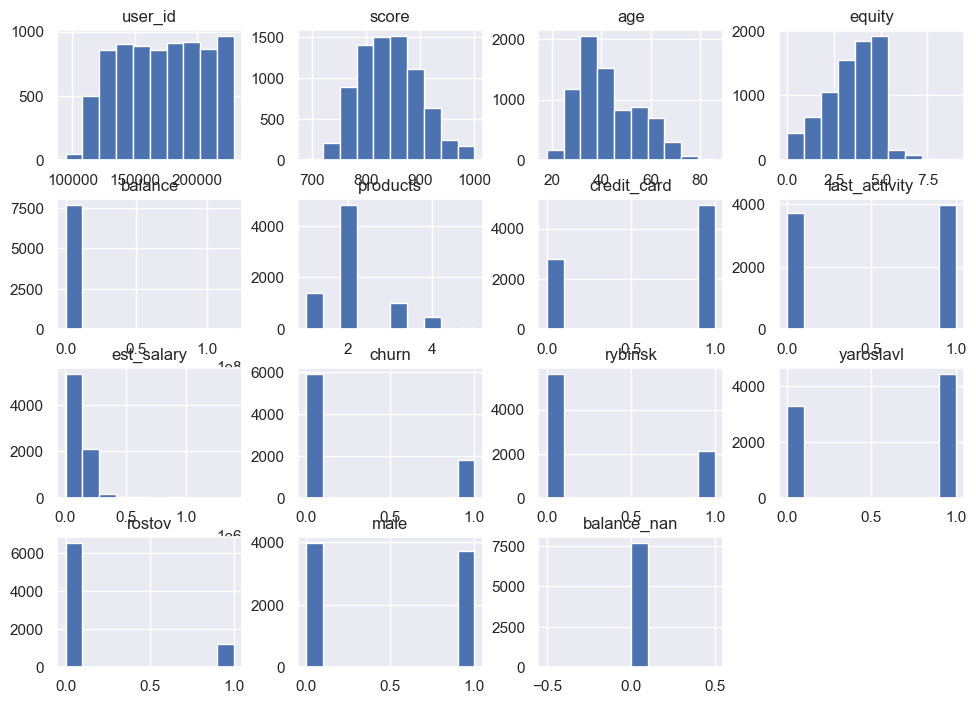

In [19]:
data[data['balance_nan'] == 0].hist();

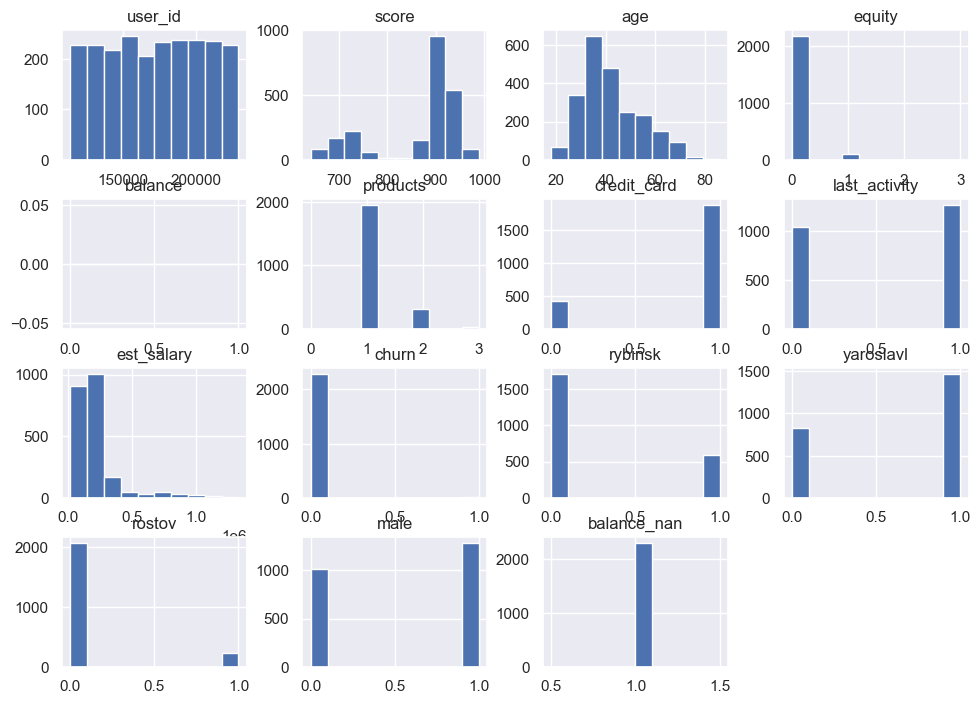

In [20]:
data[data['balance_nan'] == 1].hist();

У клиентов с пропусками и без пропусков есть большая разница в средних значениях столбцов с оценкой имущества, количеством используемых продуктов, заработной платой и оттоком. Также есть заметная разница в столбцах с баллами кредитного скоринга и полом. Таким образом, можно предположить, что пропуски в столбце с балансом не случайны, то есть типа MNAR. Значит мы не можем отбросить или заполнить их без дополнительного обоснования.

## Исследовательский анализ данных

Ознакомимся с данными и их распределением.

### Распределение в столбце score

In [21]:
print(data['score'].min())
print(data['score'].max())

642.0
1000.0


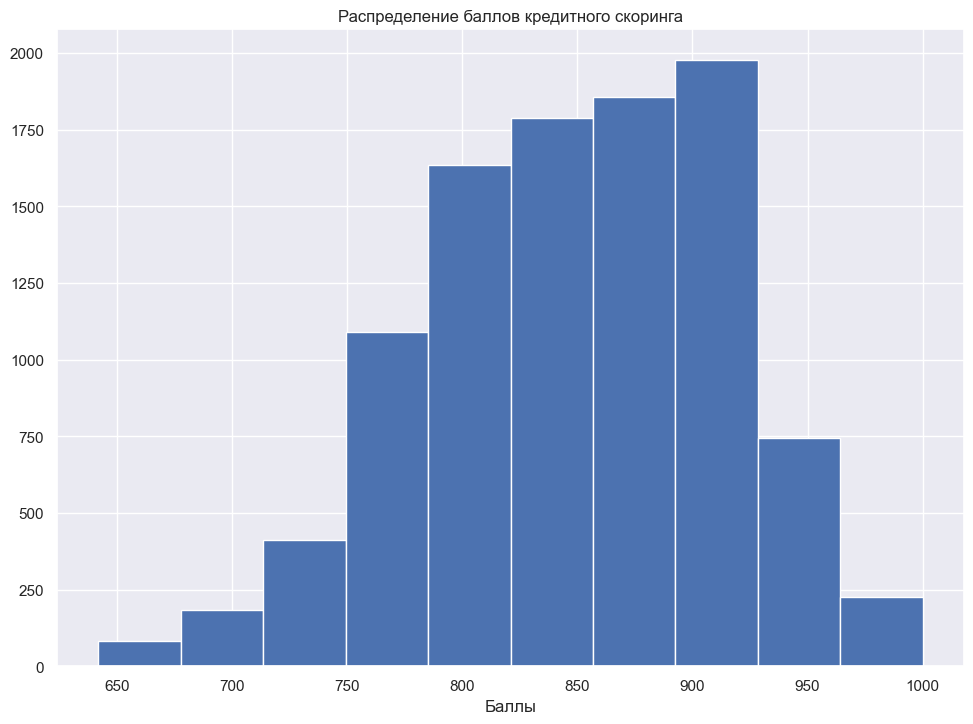

In [22]:
data['score'].hist()
plt.title('Распределение баллов кредитного скоринга')
plt.xlabel('Баллы');

Значения распределились от 642 до 1000. Наибольшее число клиентов имеют примерно от 750 до 900 баллов.

### Распределение по гендерам

In [23]:
data.groupby('gender')['gender'].count()

gender
Ж    4995
М    5005
Name: gender, dtype: int64

In [24]:
def get_pie(group, value, first_label, secons_label, title):
    grouped = data.groupby(group)[value].count()
    plt.pie(grouped, labels=[first_label, secons_label], autopct='%1.2f%%', textprops=dict(color='white'))
    plt.title(title)
    plt.legend();

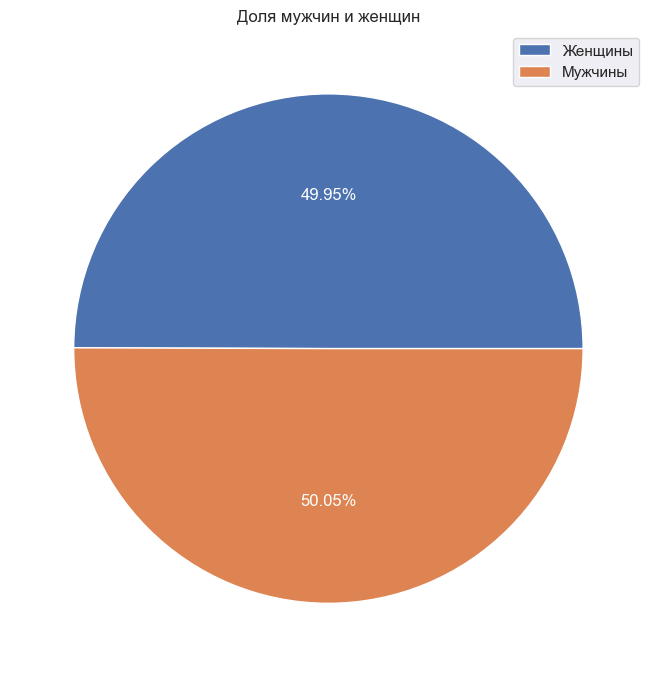

In [25]:
get_pie('gender', 'gender', 'Женщины', 'Мужчины', 'Доля мужчин и женщин')

В целом количество мужчин и женщин практически одинаковое.

### Распределение по возрасту

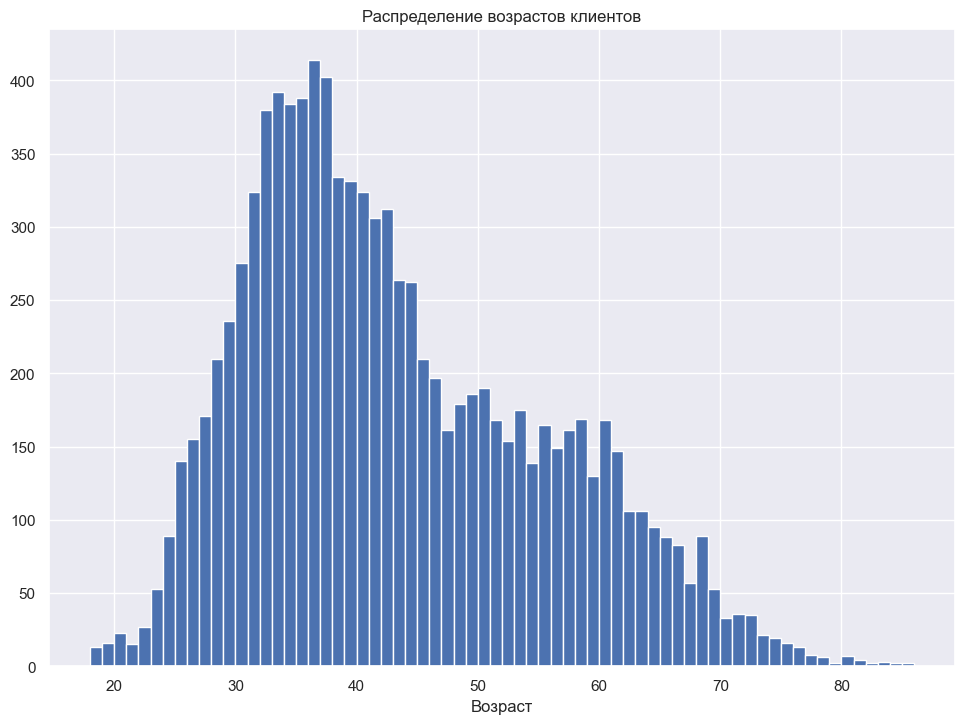

In [26]:
data['age'].hist(bins=68)
plt.title('Распределение возрастов клиентов')
plt.xlabel('Возраст');

Возрастом клиенты в основном от 30 до 45 лет.

### Распределение оценок имущества

In [27]:
data['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9], dtype=int64)

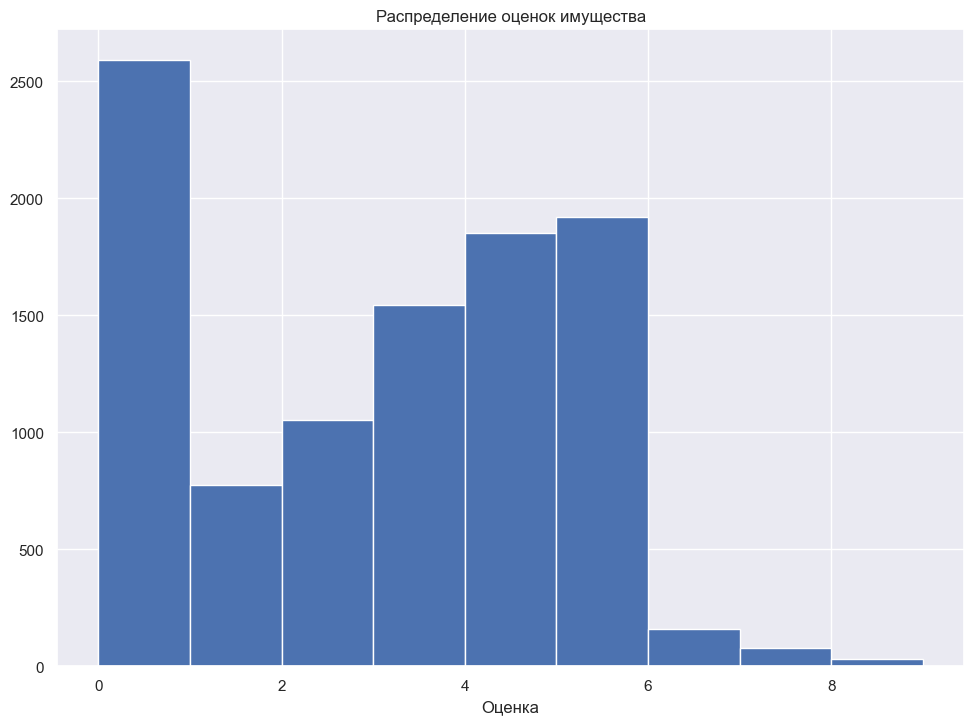

In [28]:
data['equity'].hist(bins=9)
plt.title('Распределение оценок имущества')
plt.xlabel('Оценка');

У клиентов или совсем нет имущества, или оценка находится в диапазоне от 3 до 5.

### Распределение баланса

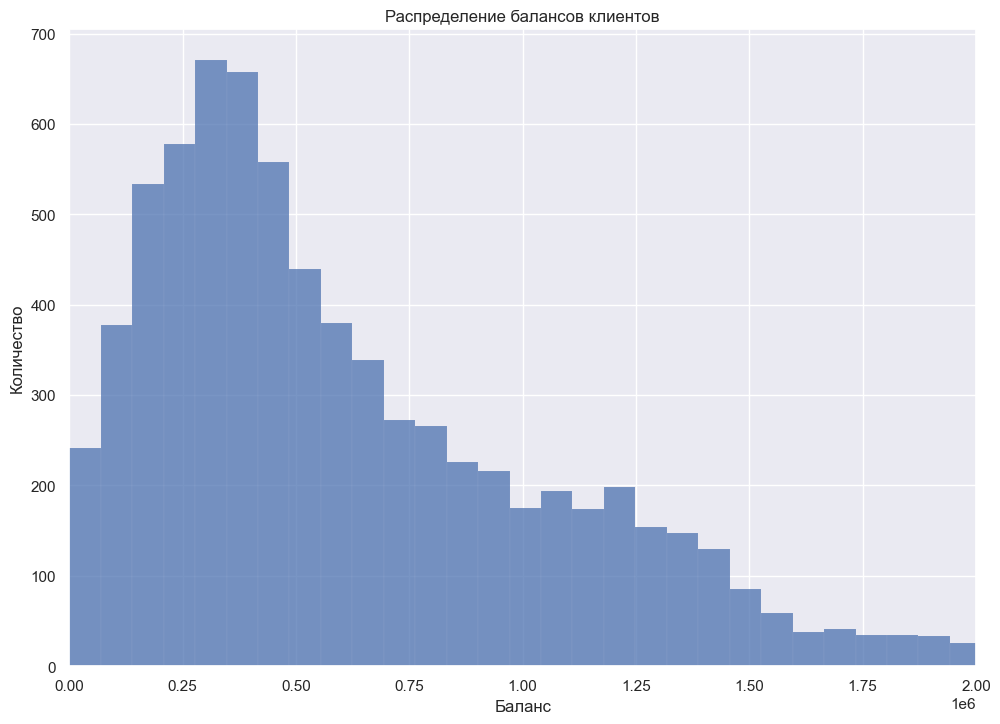

In [29]:
sns.histplot(data, x='balance')
plt.title('Распределение балансов клиентов')
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.xlim(0, 2000000);

Среди клиентов с ненулевым балансом чаще всего встречаются значения от 150 до 600 тысяч.

### Как много продуктов используют клиенты

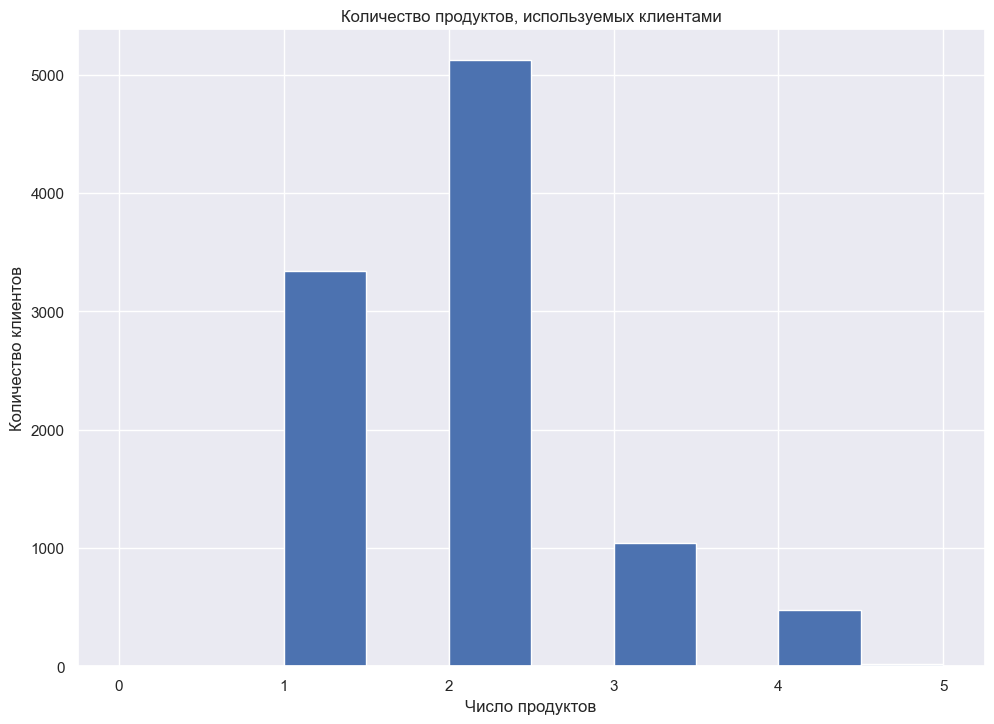

In [30]:
data['products'].hist()
plt.title('Количество продуктов, используемых клиентами')
plt.xlabel('Число продуктов')
plt.ylabel('Количество клиентов');

In [31]:
data.groupby('products')['products'].count()

products
0       1
1    3341
2    5126
3    1039
4     474
5      19
Name: products, dtype: int64

Практически нет клиентов, у которых совсем нет продуктов или больше 4. Как правило, клиенты пользуются одним-двумя продуктами.

### Наличие кредитной карты

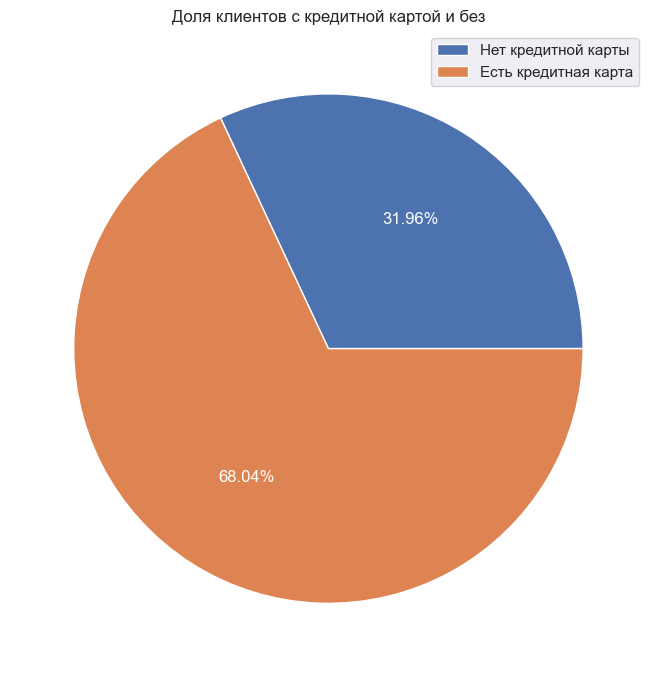

In [32]:
get_pie('credit_card', 'credit_card', 'Нет кредитной карты', 'Есть кредитная карта', 'Доля клиентов с кредитной картой и без')

### Активность клиентов

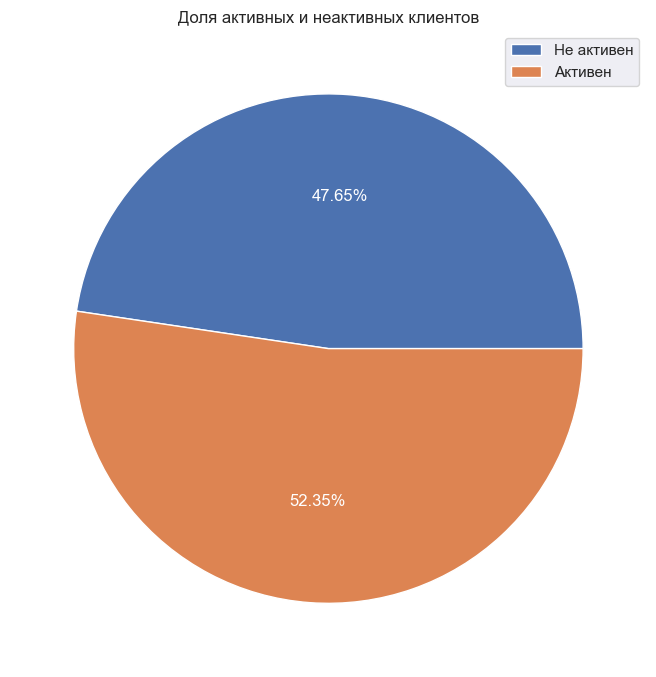

In [33]:
get_pie('last_activity', 'last_activity', 'Не активен', 'Активен', 'Доля активных и неактивных клиентов')

### Распределение зарплат клиентов

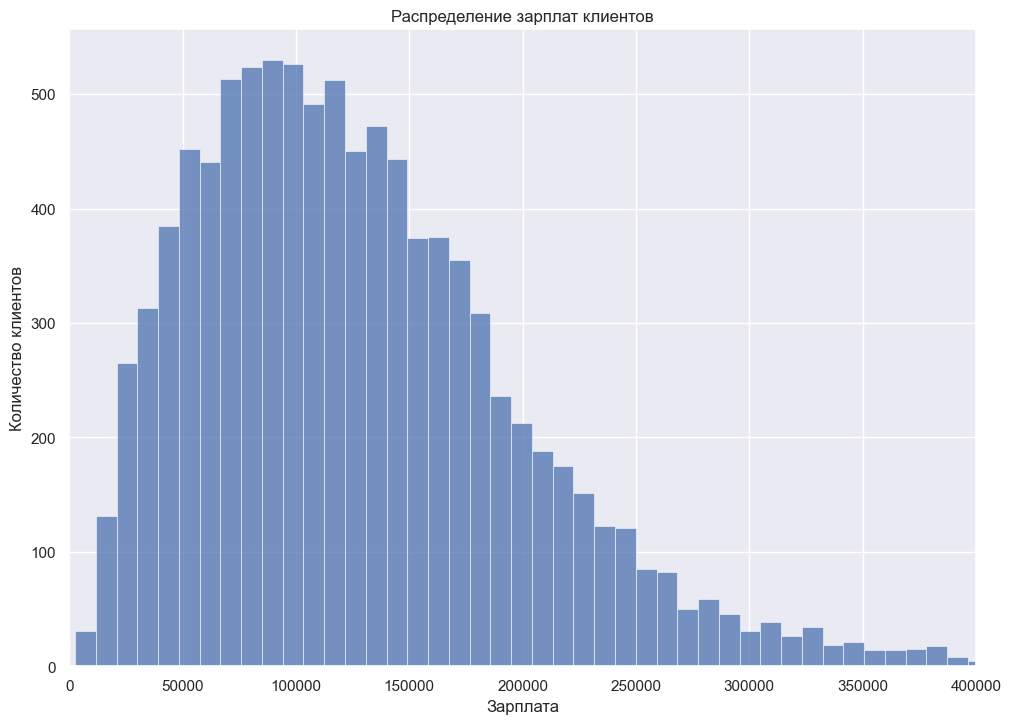

In [34]:
sns.histplot(data, x='est_salary')
plt.title('Распределение зарплат клиентов')
plt.xlabel('Зарплата')
plt.ylabel('Количество клиентов')
plt.xlim(0, 400000);

### Доля отточных клиентов

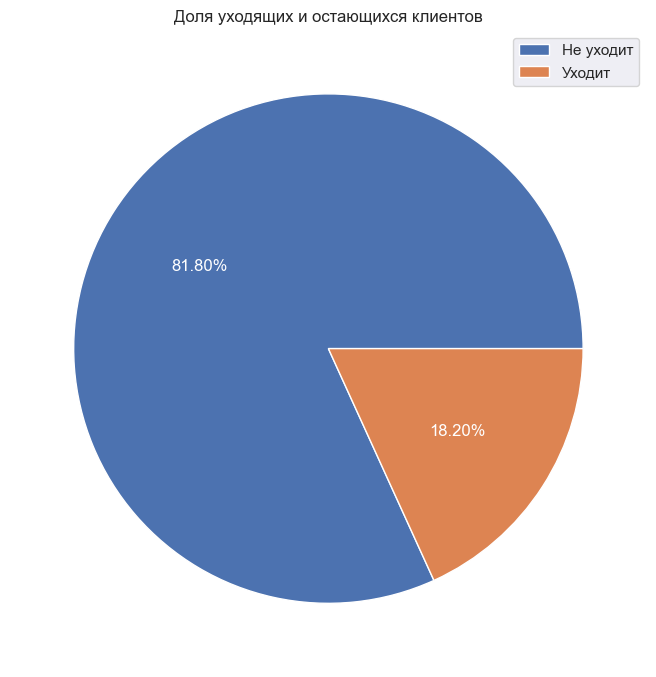

In [35]:
get_pie('churn', 'churn', 'Не уходит', 'Уходит', 'Доля уходящих и остающихся клиентов')

Из десяти тысяч клиентов почти 20% собираются перестать пользоваться услугами банка. Это довольно-таки много.

### Корреляционный анализ

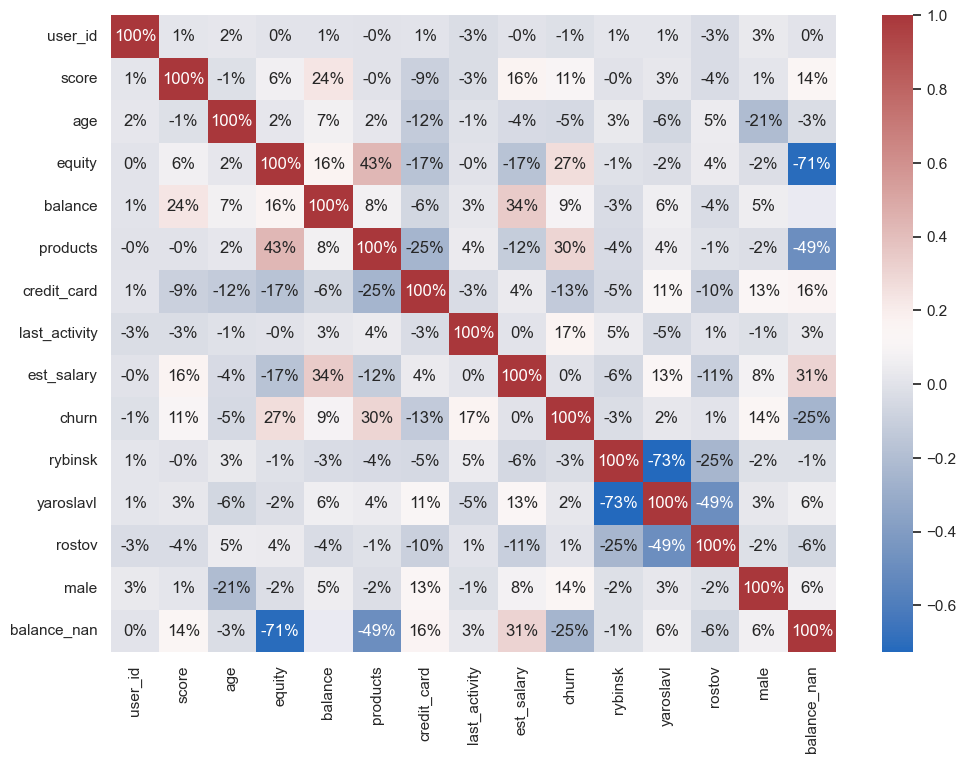

In [36]:
df_corr = data.corr()
sns.heatmap(df_corr, annot=True, fmt='.0%', cmap='vlag');

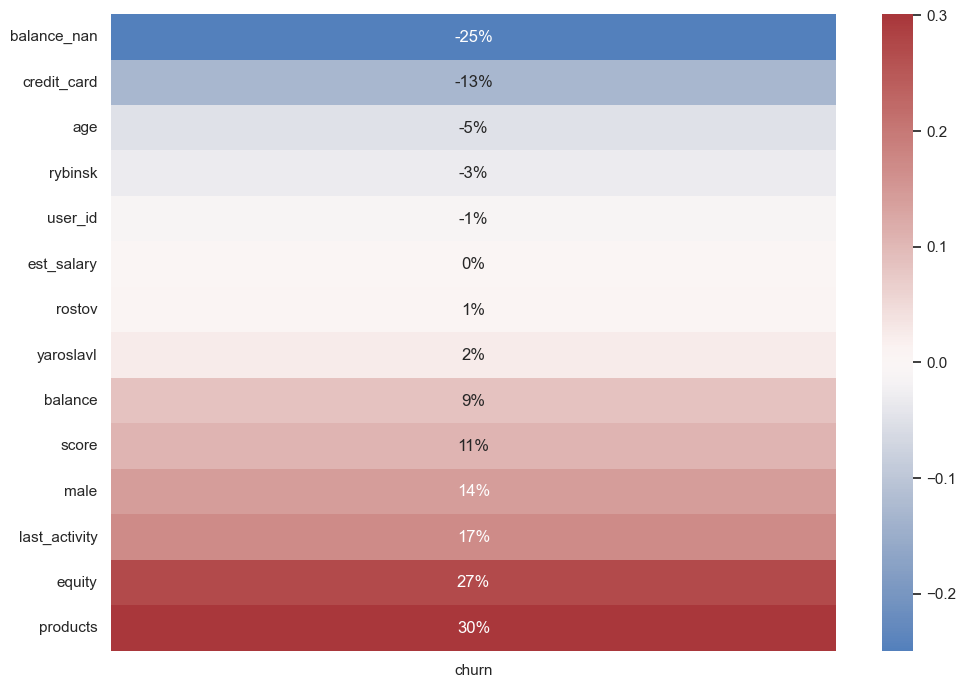

In [37]:
sns.heatmap(
    df_corr.loc[:, ['churn']].drop('churn').sort_values('churn'),
    annot=True, fmt='.0%', cmap='vlag', center=0
);

По шкале Чеддока все связи параметров с целевой характеристикой слабые. По модулю выше 10% обратно пропорционально целевая характеристика связана с параметрами: пропуск в столбце с балансом, credit_card. Прямая зависимость с параметрами: score, male, last_activity, equity, products.

### Выделение портретов клиентов, склонных к уходу

#### Средний уровень оттока

In [38]:
data.groupby('churn')['churn'].count()

churn
0    8180
1    1820
Name: churn, dtype: int64

Соответственно, средний уровень оттока по всему датасету будет 18,2%.

#### Плотность зарплат клиентов

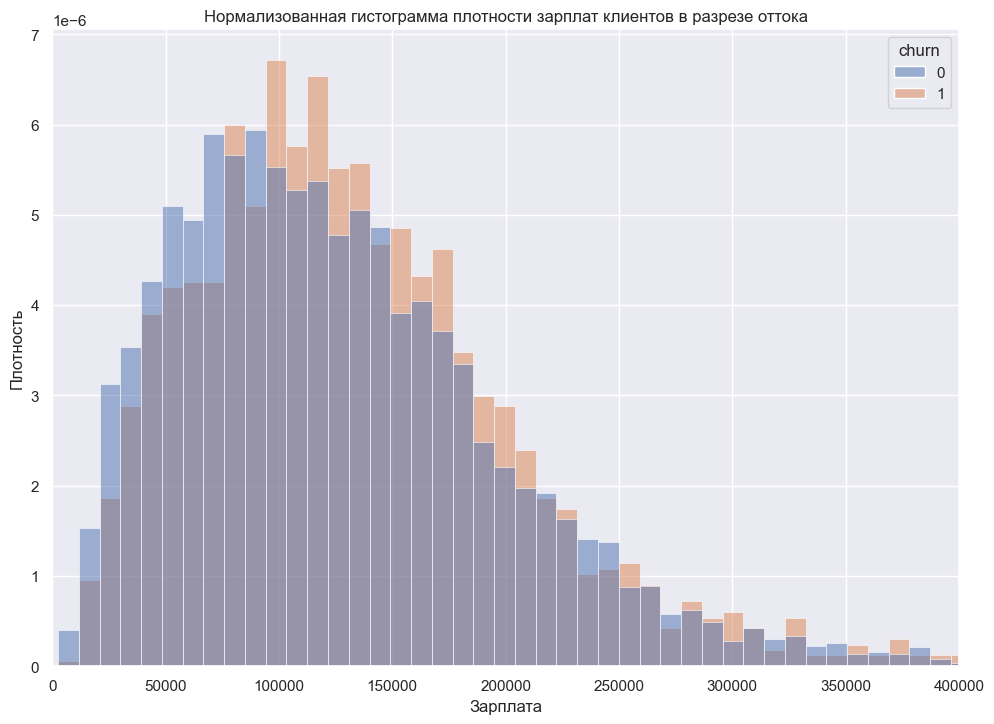

In [39]:
sns.histplot(data, x='est_salary', hue='churn', stat='density', common_norm=False)
plt.title('Нормализованная гистограмма плотности зарплат клиентов в разрезе оттока')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.xlim(0, 400000);

Как видно на графике, уровень оттока выше среднего, в основном, в правой части графика.

In [40]:
data.query('est_salary > 220000').groupby('churn')['churn'].count()

churn
0    1114
1     231
Name: churn, dtype: int64

Уровень оттока клиентов с доходом более 220 тысяч в месяц составляет 17%, что меньше, чем в среднем по всем клиентам.

#### Плотность баллов кредитного скоринга

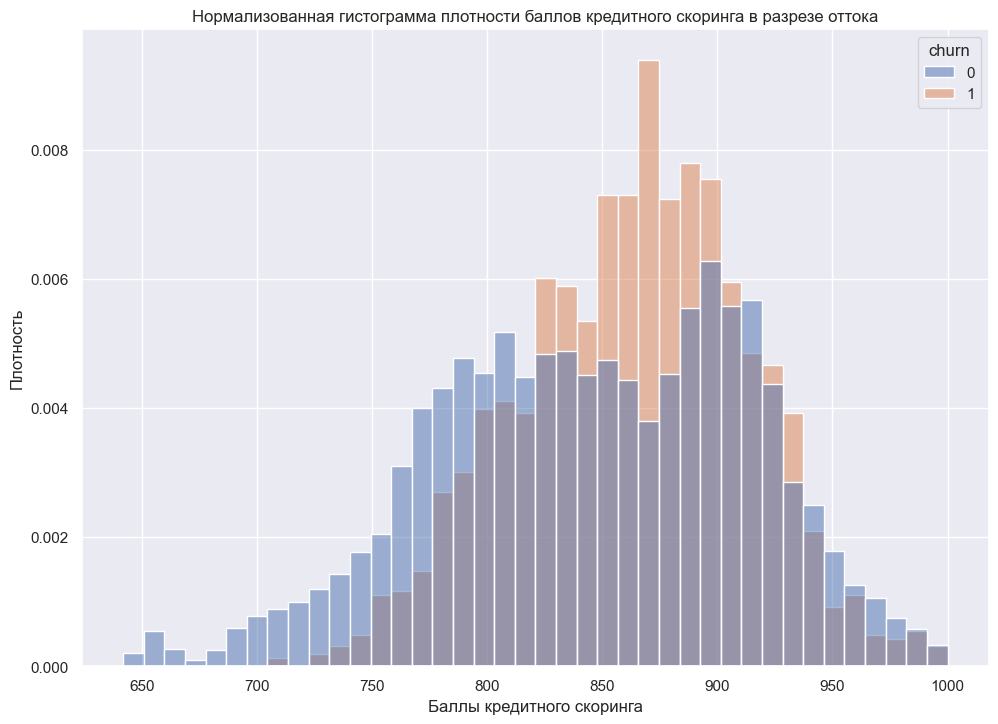

In [41]:
sns.histplot(data, x='score', hue='churn', stat='density', common_norm=False)
plt.title('Нормализованная гистограмма плотности баллов кредитного скоринга в разрезе оттока')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность');

Клиенты, у которых низкий балл, в основном остаются. Начиная с примерно 830 и заканчивая в районе 930 баллов, мы видим, что идет тенденция к уходу. Возможно, кредитоспособных людей переманивают конкуренты выгодными условиями.

#### Плотность возраста клиентов

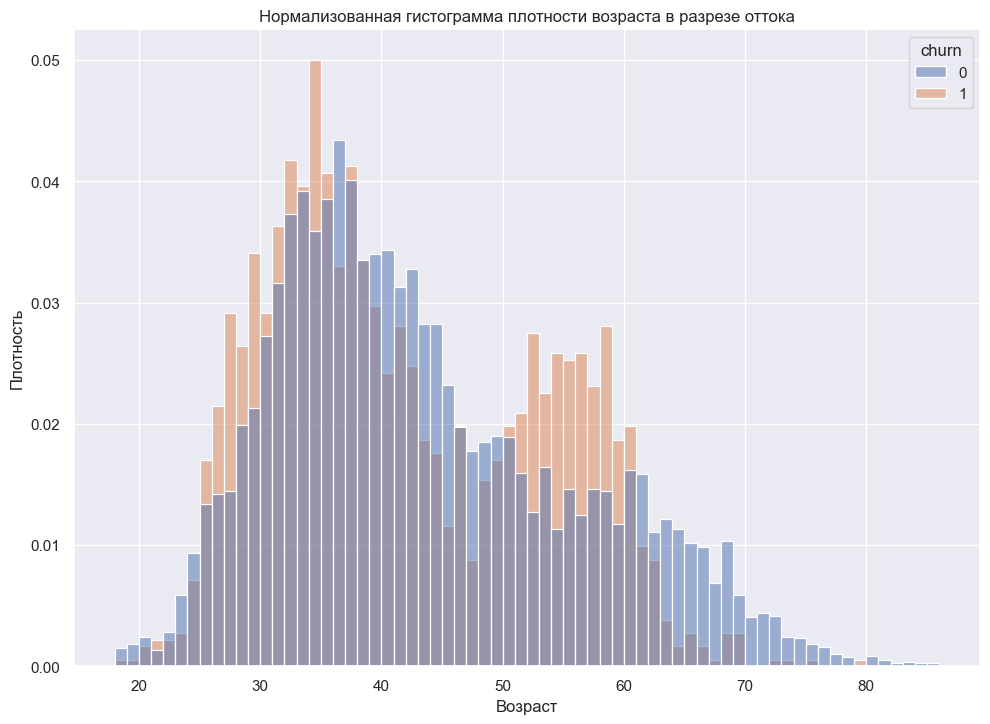

In [42]:
sns.histplot(data, x='age', bins=68, hue='churn', stat='density', common_norm=False)
plt.title('Нормализованная гистограмма плотности возраста в разрезе оттока')
plt.xlabel('Возраст')
plt.ylabel('Плотность');

Уходят клиенты, в основном, возрастом от 25 до 35 и от 50 до 60.

#### Плотность баланса клиентов

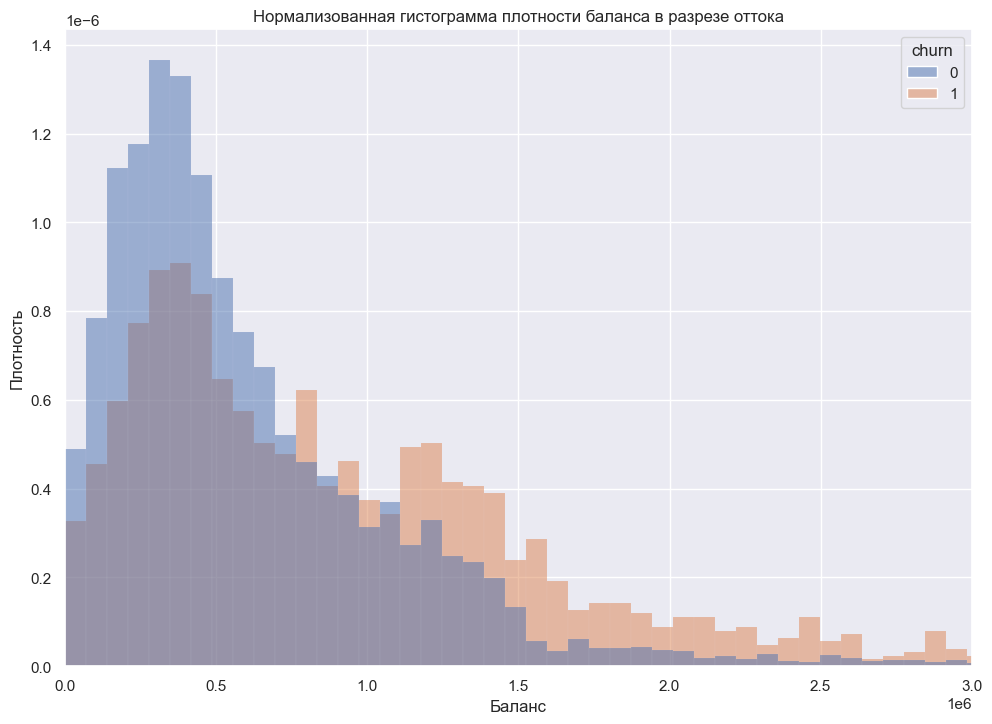

In [43]:
sns.histplot(data, x='balance', hue='churn', stat='density', common_norm=False)
plt.title('Нормализованная гистограмма плотности баланса в разрезе оттока')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.xlim(0, 3000000);

Уходят клиенты с большими суммами на балансе.

In [44]:
data.query('balance < 910000').groupby('churn')['churn'].count()

churn
0    4552
1    1013
Name: churn, dtype: int64

Начиная с суммы в 910 тысяч вероятность оттока клиентов становится больше, чем в целом по банку.

#### Отток пользователей с пропусками в столбце с балансом

In [45]:
def get_bar(group, title, x_label):
    grouped = round(data.groupby(group)['churn'].mean(), 2)
    sns.barplot(x=grouped.index, y=grouped)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('% оттока')
    plt.axhline(y=0.182, color='red', linestyle='--');

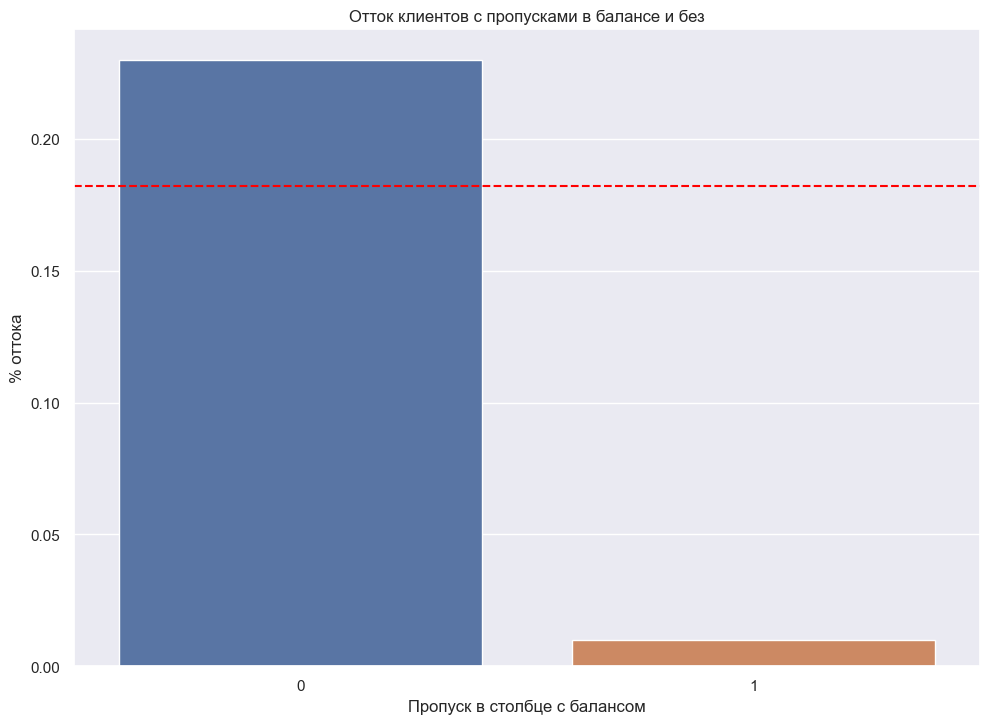

In [46]:
get_bar('balance_nan', 'Отток клиентов с пропусками в балансе и без', 'Пропуск в столбце с балансом')

Клиенты с пропуском в столбце с балансом практически не уходят, когда те, у кого баланс не пустой, уходят. Причем отток в этой категории почти 25%, что больше среднего. Здесь уже можно наткнуться на мысль, что клиенты не довольны, как работают их деньги и уходят к конкурентам, возможно, за лучшими условиями, процентными ставками и т.д.

#### Отток клиентов по гендеру

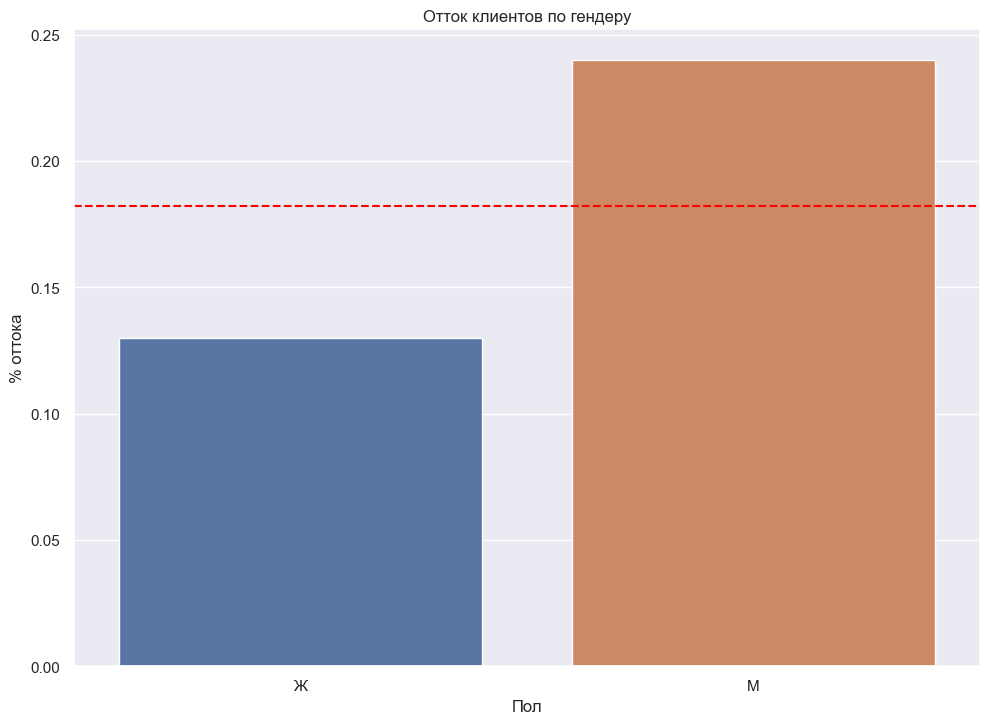

In [47]:
get_bar('gender', 'Отток клиентов по гендеру', 'Пол')

На графике видно, что мужчин уходит почти в два раза больше, чем женщин, хотя в целом вреди клиентов количество мужчин и женщин практически одинаковое.

#### Отток клиентов по наличию кредитной карты

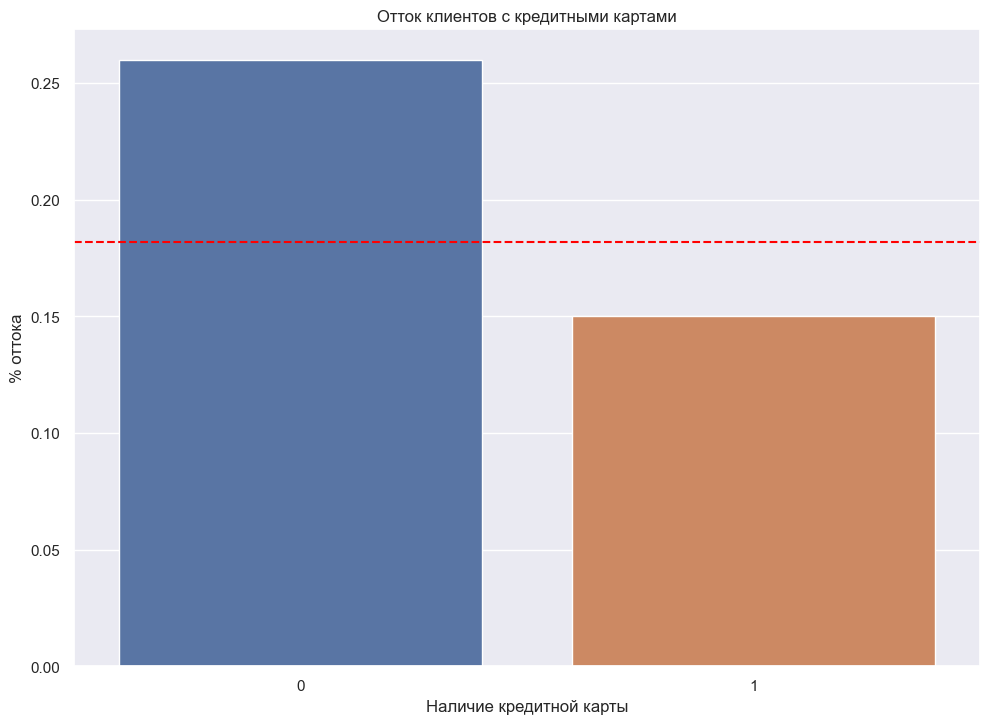

In [48]:
get_bar('credit_card', 'Отток клиентов с кредитными картами', 'Наличие кредитной карты')

Вполне логично, что люди, у которых есть кредитка, скорее всего, не могут так просто отказаться от услуг банка, так как для этого сначала нужно закрыть задолженности по кредитке, что может сделать не каждый.

#### Отток клиентов по городам

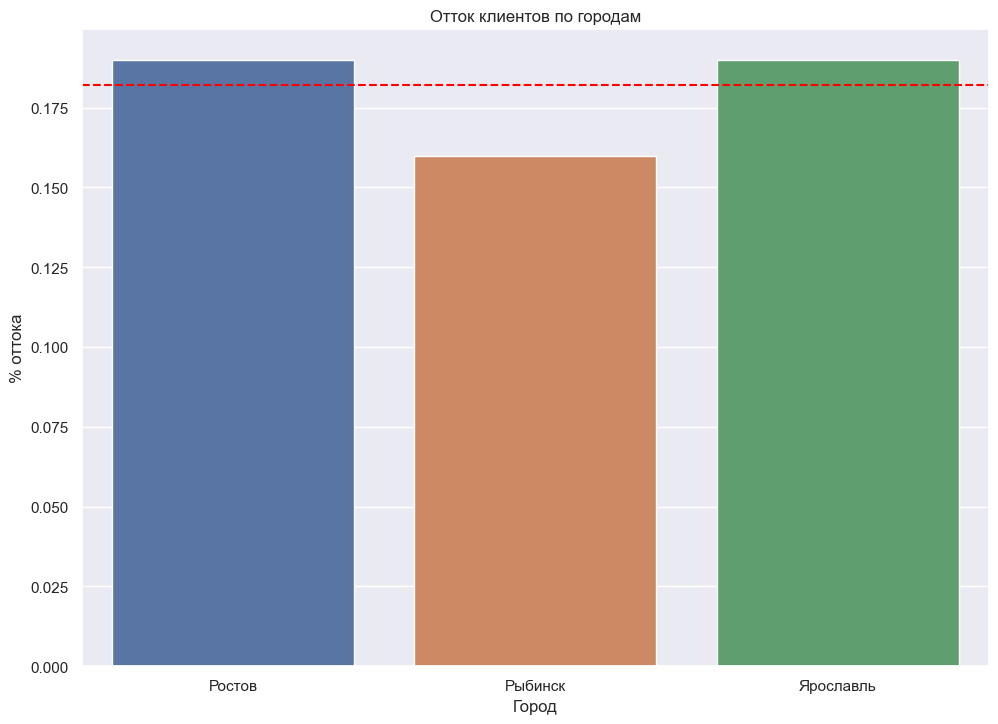

In [49]:
city_grouped = round(data.groupby('city')['churn'].mean(), 2)
sns.barplot(x=city_grouped.index, y=city_grouped)
plt.title('Отток клиентов по городам')
plt.xlabel('Город')
plt.ylabel('% оттока')
plt.axhline(y=0.182, color='red', linestyle='--');

В Ростове наименьший среди остальных городов процент оттока.

#### Отток клиентов в зависимости от активности

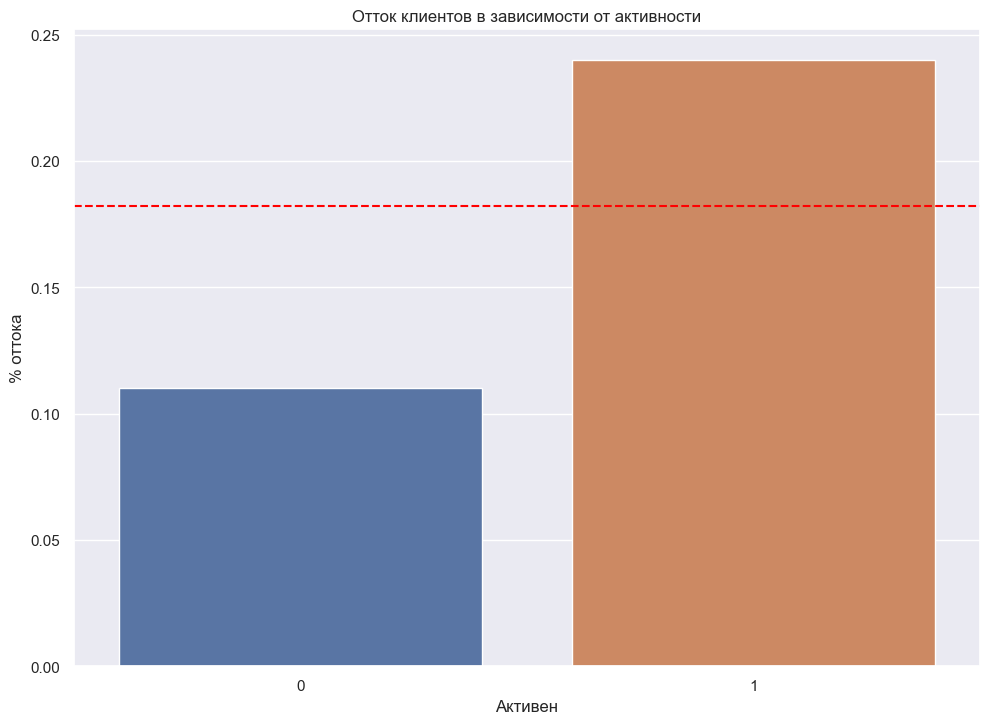

In [50]:
get_bar('last_activity', 'Отток клиентов в зависимости от активности', 'Активен')

Мы видим, что уходят, как правило, активные клиенты.

#### Отток клиентов в зависимости от оценки имущества

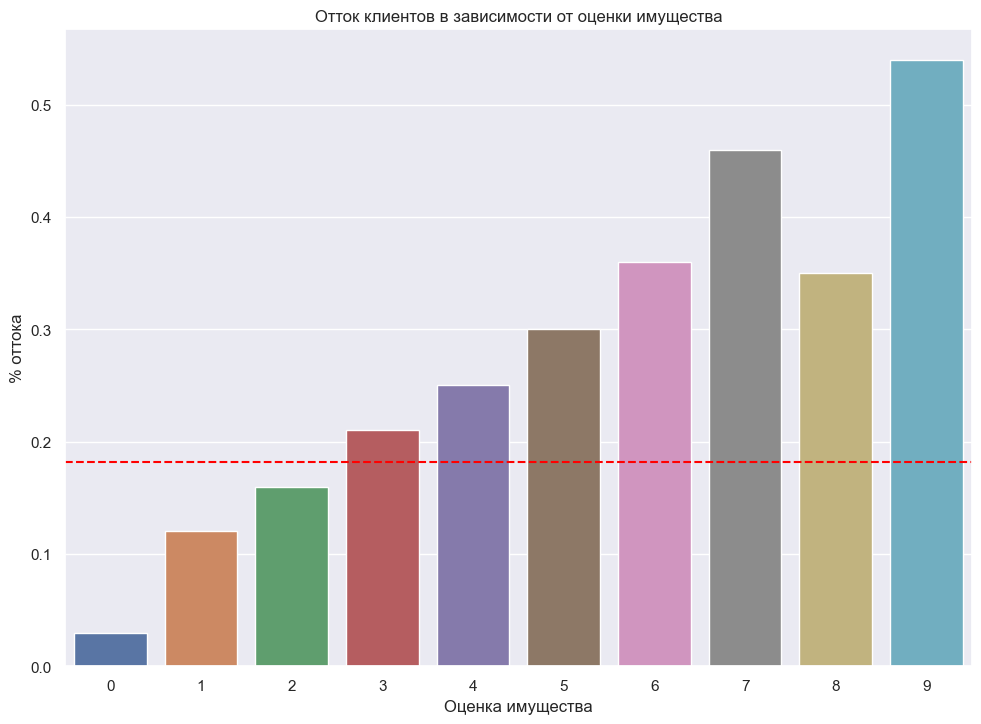

In [51]:
get_bar('equity', 'Отток клиентов в зависимости от оценки имущества', 'Оценка имущества')

Наглядно видно, что чем больше у клиента имущества, тем вероятнее он перестанет пользоваться услугами банка. Начиная с клиентов, имеющих оценку имущества 3 и выше, процент оттока становится больше среднего.

#### Отток клиентов в зависимости от количества использумых продуктов

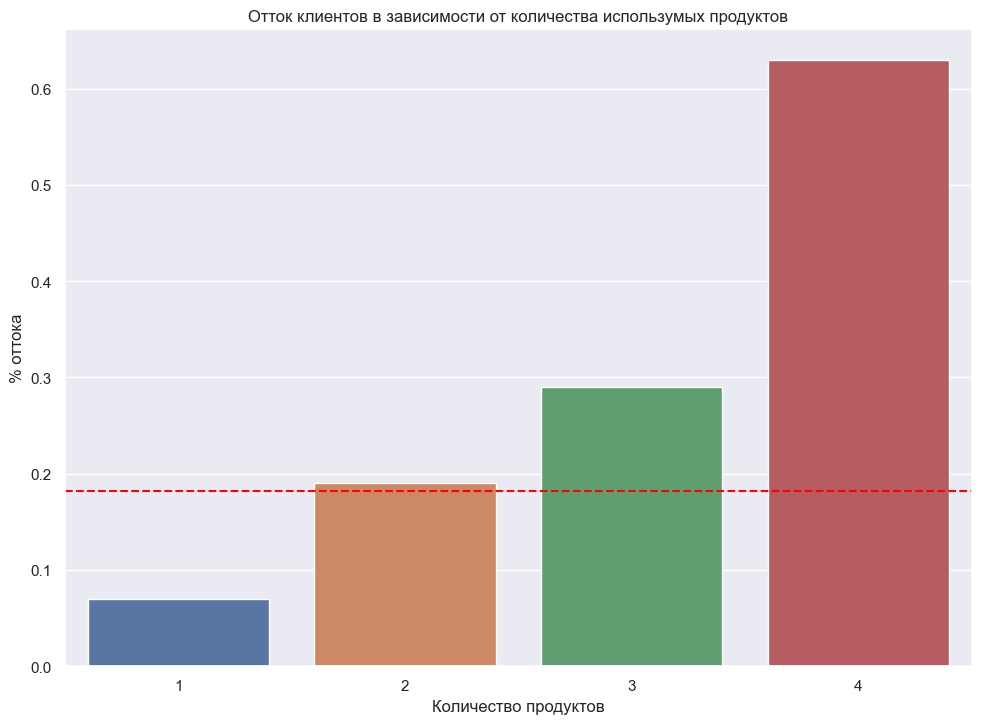

In [52]:
grouped = round(data.loc[(data['products'] != 0) & (data['products'] != 5)].groupby('products')['churn'].mean(), 2)
sns.barplot(x=grouped.index, y=grouped)
plt.title('Отток клиентов в зависимости от количества использумых продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('% оттока')
plt.axhline(y=0.182, color='red', linestyle='--');

Видно, что чем большим количеством продуктов пользуется клиент, тем вероятнее он уйдет. Начиная с клиентов, пользующихся от 2 и более продуктов, процент оттока выше, чем в среднем.

## Проверка статистических гипотез

Гипотеза 1: 
* H0: средний доход оставшихся и ушедших клиентов не отличается
* H1: средний доход отличается

Гипотеза 2: 
* H0: средний баланс оставшихся и ушедших клиентов не отличается
* H1: средний баланс отличается

In [53]:
churned = data[data['churn'] == 1]
stayed = data[data['churn'] == 0]

### Первая гипотеза о равенстве дохода

In [54]:
alpha = .05
results = st.ttest_ind(churned['est_salary'], stayed['est_salary'], equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8887054822123845
Не получилось отвергнуть нулевую гипотезу


Дополнительный параметр equal_var использован потому, что выборки сильно отличаются по размеру. <br>
Гипотезу не удалось отвергнуть, pvalue сильно выше alpha, таким образом, нельзя сказать, что доход ушедших и оставшихся клиентов сильно различается.

Проверим гипотезу другим статистическим тестом Манна-Уитни.

In [55]:
results = st.mannwhitneyu(churned['est_salary'], stayed['est_salary'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.000243559272811695
Отвергаем нулевую гипотезу: разница статистически значима


Мы видим, что возникла большая разница в результатах тестов. В данном случае стоит больше доверять результатам теста Манна-Уитни, так как в данных имеются большие выбросы, которые сильно влияют на среднее, в то время как тест Манна-Уитни от этого застрахован, так как работает не с самими значениями, а с их рангами. Таким образом, разница между доходами оставшихся клиентов и ушедших все же есть. И как мы помним из графиков, доход отточных клиентов больше.

### Вторая гипотеза о равенстве балансов

Вторую гипотезу о равенстве балансов также проверим тестом Манна-Уитни, снова из-за присутствия выбросов в данных.

In [56]:
results = st.mannwhitneyu(churned.dropna()['balance'], stayed.dropna()['balance'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  1.4891162831993242e-70
Отвергаем нулевую гипотезу: разница статистически значима


Как и предполагалось, есть сильное различие в балансах отточных клиентов и остающихся. Опять же, как мы помним из графиков, у уходящих клиентов баланс, как правило, намного больше.

## Стратегические показатели, влияющие на отток, и сегментация

К стратегическим показателям, влияющим на отток, можно отнести баланс, наличие кредитной карты, активность, пол, баллы кредитного скоринга, количество используемых продуктов, оценка имущества, а также пропуск в столбце с балансом. Проведем сегментацию на основе этих признаков, найдем сегменты с самым большим процентом оттока.

### Сегмент 1. Клиенты мужского пола с непустым балансом и без кредитной карты

In [57]:
data.query('credit_card == 0 and balance > 0 and gender == "М"').groupby('churn')['churn'].count()

churn
0    633
1    456
Name: churn, dtype: int64

В сегменте 1089 человек. Из них 456 собираются уйти, что соответствует ~42%. Это намного выше среднего показателя.

### Сегмент 2. Активные клиенты с большим балансом и хорошим кредитным скорингом

In [58]:
data.query('balance > 910000 and last_activity == 1 and 830 < score < 930').groupby('churn')['churn'].count()

churn
0    262
1    430
Name: churn, dtype: int64

В сегменте активных клиентов с балансом свыше 910 тысяч, и хорошим кредитным скорингом 692 человека, 430 из которых собираются уйти. Это почти 62%.

### Сегмент 3. Клиенты мужского пола от 50 до 60 лет с более, чем одним продуктом

In [59]:
data.query('gender == "М" and 50 < age < 60 and products > 1').groupby('churn')['churn'].count()

churn
0    250
1    193
Name: churn, dtype: int64

В сегменте клиентов мужского пола возрастом от 50 до 60 лет, пользующихся больше, чем одним продуктов, оказалось 443 человека. Из них 193 собираются уйти, что соответствует почти 44%.

### Сегмент 4. Возрастные клиенты с большим балансом и оценкой имущества больше 2

In [60]:
data.query('balance > 910000 and equity > 2 and 50 < age < 60').groupby('churn')['churn'].count()

churn
0    193
1    183
Name: churn, dtype: int64

376 клиентов в сегменте. 183 из них хотят уйти, что соответствует 49%. Хоть сегмент маленький, но достаточно отточный.

Тремя лучшими сегментами являются: первый, второй и четвертый. Второй за очень высокую отточность. Первый за большое количество клиентов и высокую отточность. Четвертый за высокую отточность.

In [61]:
### КОД РЕВЬЮЕРА 2
df=data.copy()
qrys = (
    'credit_card == 0 and balance > 0 and gender == "М"',
    'balance > 910000 and last_activity == 1 and 830 < score < 930',
    'balance > 910000 and equity > 2 and 50 < age < 60')

display(pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys]).style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))

all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if len(qrys) != 3:
    print('Результаты ниже некорректны, нужно 3 лучших сегмента')
    
if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

,Отток,Размер
"credit_card == 0 and balance > 0 and gender == ""М""",41.9%,1_089
balance > 910000 and last_activity == 1 and 830 < score < 930,62.1%,692
balance > 910000 and equity > 2 and 50 < age < 60,48.7%,376


В сегменты попало: 791/1820 = 43.5%


## Выводы и рекомендации

В результате исследования можно сделать следующие выводы: больше всего целевая характеристика коррелирует с параметрами пропуска в столбце с балансом, наличия кредитной карты, кредитного скоринга, пола, активности, оценки имущества и количества используемых продуктов. Как выяснилось из статистических тестов, доход и размер баланса клиента также связаны с желанием уйти. Примерно четверть клиентов, у кого нет пропуска в столбце с балансом, хотят уйти. Больше четверти клиентов без кредитной карты также хотят уйти. В портрете отточного клиента сильное отражение нашел пол: среди уходящих клиентов в два раза больше мужчин. Среди клиентов с хорошими баллами кредитного скоринга от 830 до 930 также большой показатель желания отказаться от услуг банка. Большое недовольство среди пользователей большого количества продуктов банка (больше 1) и оценкой имущества больше 2. Таким образом, отделу маркетинга будут предложены следующие рекомендации: клиентам первого сегмента стоит попробовать предложить оформить кредитную карту, объяснить ее плюсы и выгоду при грамотном использовании, предложить беспроцентный период. Клиентам второго сегмента стоит предложить более высокий процент по вкладам: у них хороший кредитный скоринг и большой баланс, скорее всего, они заинтересованы в том, чтобы выгодно вложить свои деньги. Среди возрастных клиентов мужского пола, пользующихся более, чем один продуктом, также высокая отточность: судя по всему, они не довольны имеющимися условиями, стоит пересмотреть их, предложить новые взамен старых. Четвертому сегменту, как и второму, стоит предложить хороший процент по вкладам, так как у этих клиентов большие балансы, а так же люди в возрасте хотят сохранить и как можно больше преумножить свои сбережения.

In [64]:
#data.to_csv('data_for_dashboard.csv')